# Problem sheet 3 - Contact Process

The contact process in 1D has rates to flip the state of agent i given by
$$
c(\eta ,\eta^i )=\eta (i)+\lambda\big( 1-\eta (i)\big)\big(\eta (i+1)+\eta (i-1)\big)\ .
$$
We implement a rejection-based random sequential algorithm. The local rates at i are: 1 for recovery, $\lambda$ for infection with one infected neighbour, and $2\lambda$ for two infected neighbours.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import random
import time

### Simulation:
- Sample a sites $i$ uniformly, independently with rate $L*rmax=2\lambda L$. 
- update site $i$ with correct probability

I tried several versions and this seems to be the fastest Python can do, with drawing a list of random variables in advance using np.random. Still this is nowhere near the speed needed to do the homework...

$\Rightarrow$ do NOT use Python for more involved MC simulations

In [70]:
### Parameters ###

runs=10   ## of simulations for average

𝜆=1.68    #infection rate
L=128     ## of agents

tmax=10.*L     #simulation time
outs=200       ## of outputs in time
deltat=tmax/outs   #time between outputs

rates=[0.,𝜆,2*𝜆,1.]
rmax=max(rates)
pr=[x/rmax for x in rates]

wait=1./(L*rmax)

#################

N=np.zeros(outs, dtype=int)              #initialize fraction of infecteds vector

t0=time.time()

for k in range(0, runs):
    randi=np.random.randint(128, size=int((tmax+2)*L*rmax))   #generate enough random indices
    randu=np.random.random_sample(int((tmax+2)*L*rmax))       #random uniforms
    rind=0                                                    #index for rands

    𝜂=np.ones((L,), dtype=int)   #initialize current configuration
    nii=L                        ## of infecteds
    
    t=0.0
    nextout=deltat
    kout=0
    
    while (t<tmax): # loop until done 
        while (t<nextout):
#            wait=np.random.exponential(meanwait) # random holding time
            pos=randi[rind]
            if (𝜂[pos]==1):
                if (randu[rind]<pr[3]):
                    𝜂[pos]=0
                    nii+=-1
            else:
                nin=𝜂[(pos+1)%L]+𝜂[(pos-1)%L]
                if (randu[rind]<pr[nin]):
                    𝜂[pos]=1
                    nii+=1
            rind+=1
            t+=wait
            
        N[kout]+=nii
        kout+=1
        nextout+=deltat
    
Nnorm = [1.*x/(runs*L) for x in N]

t1=time.time()
print(t1-t0)

15.604384422302246


In [67]:
times=np.arange(np.shape(N)[0])*deltat

Text(0.5, 1.0, '$N_t$ Number of individuals of each species \n out of total population size L = 128')

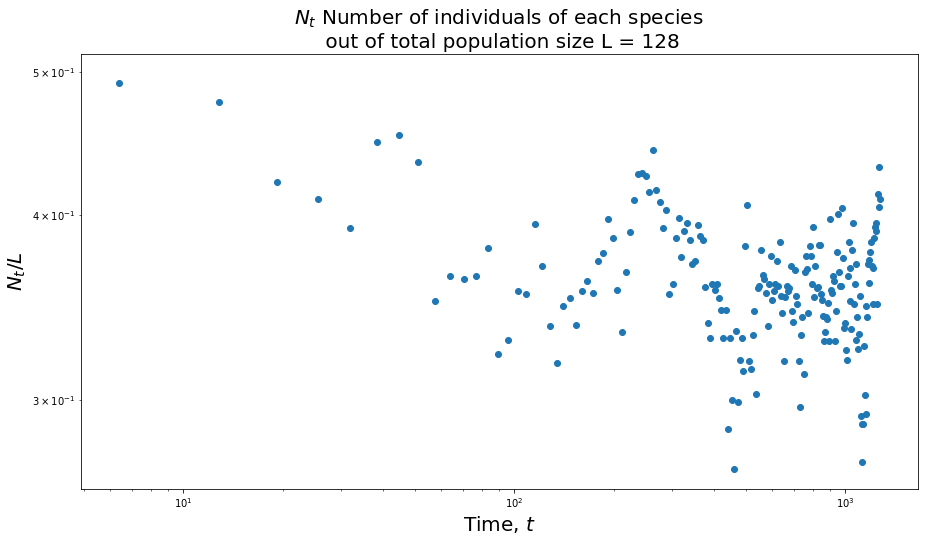

In [68]:
plt.figure(figsize = (15,8))
plt.plot(times,Nnorm,'o')

plt.xscale('log')
plt.yscale('log')
    
plt.xlabel('Time, $t$', fontsize = 20)
plt.ylabel('$N_t /L$', fontsize= 20)

plt.title("$N_t$ Number of individuals of each species \n out of total population size L = {}".format(L), fontsize = 20)

In [80]:
data1 = np.loadtxt("contact_n512_l16.3.dat", delimiter=' ')
data2 = np.loadtxt("contact_n512_l16.4.dat", delimiter=' ')
data3 = np.loadtxt("contact_n512_l16.5.dat", delimiter=' ')
data4 = np.loadtxt("contact_n512_l16.6.dat", delimiter=' ')
data5 = np.loadtxt("contact_n512_l16.7.dat", delimiter=' ')
data6 = np.loadtxt("contact_n512_l16.8.dat", delimiter=' ')

In [81]:
ydata1=sum([data1[k*200:(k+1)*200,0] for k in range(500)])/500/512;
ydata2=sum([data2[k*200:(k+1)*200,0] for k in range(500)])/500/512;
ydata3=sum([data3[k*200:(k+1)*200,0] for k in range(500)])/500/512;
ydata4=sum([data4[k*200:(k+1)*200,0] for k in range(500)])/500/512;
ydata5=sum([data5[k*200:(k+1)*200,0] for k in range(500)])/500/512;
ydata6=sum([data6[k*200:(k+1)*200,0] for k in range(500)])/500/512;

In [82]:
times=data1[0:200,1];

Text(0, 0.5, '$N_t /L$')

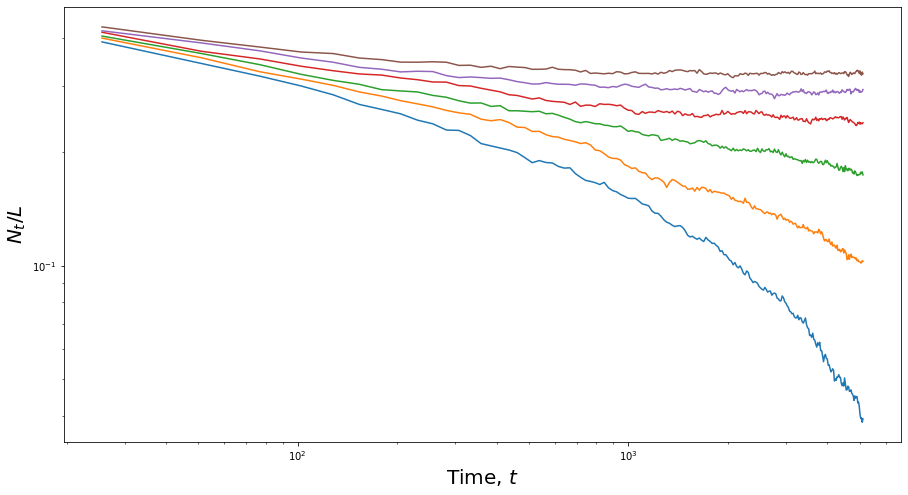

In [84]:
plt.figure(figsize = (15,8))
plt.plot(times,ydata1)
plt.plot(times,ydata2)
plt.plot(times,ydata3)
plt.plot(times,ydata4)
plt.plot(times,ydata5)
plt.plot(times,ydata6)


plt.xscale('log')
plt.yscale('log')
    
plt.xlabel('Time, $t$', fontsize = 20)
plt.ylabel('$N_t /L$', fontsize= 20)

#  Mean-field Contact Process

## Simulate total number of infecteds

In [147]:
### Parameters ###

L=512     ## of agents
lah=1.1
𝜆=lah/L    #infection rate

tmax=10.     #simulation time
outs=500       ## of outputs in time
deltat=tmax/outs   #time between outputs


#################

N=np.ones(outs+1)              #initialize output vector (normalized)
state=50                                 #initialize current state 
N[0]=0.1

tt=[1./(𝜆*(L-n)*n+n) for n in (np.arange(L)+1)]
tt=np.concatenate(([0],tt))
pm=[1./(𝜆*(L-m)+1.) for m in (np.arange(L)+1)]
pm=np.concatenate(([0],pm))

t0=time.time()

t=0.0
nextout=deltat
kout=1

while (t<tmax): # loop until done 
    while (t<nextout):
        t+=tt[state]
        if (random.random()<pm[state]):
            state+=-1
        else:
            state+=+1
        if (state==0):
            t=tmax+1.
    N[kout]=(state+0.)/(L+0.)
    kout+=1
    nextout+=deltat

t1=time.time()
print(t1-t0)

0.0


In [148]:
times=np.arange(np.shape(N)[0])*deltat

Text(0, 0.5, '$N_t /L$')

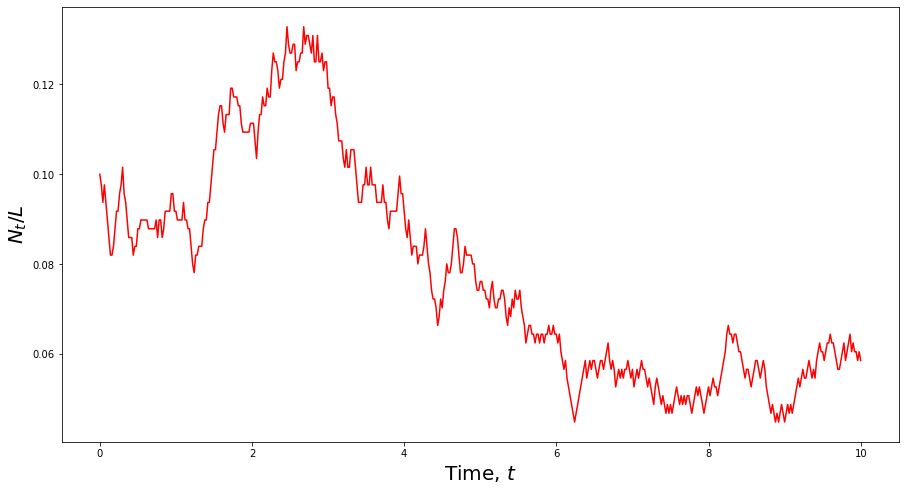

In [149]:
plt.figure(figsize = (15,8))
plt.plot(times,N,'r')

#plt.xscale('log')
#plt.yscale('log')
    
plt.xlabel('Time, $t$', fontsize = 20)
plt.ylabel('$N_t /L$', fontsize= 20)

#plt.title("$N_t $ Number of individuals of each species \n out of total population size L = {}".format(L), fontsize = 20)

In [126]:
from scipy import stats
from scipy.stats import poisson
import sdeint

In [152]:
def fX(x, t):
    return lah*(1-x)*x-x

def gX(x, t):
    return np.sqrt((lah*(1-x)*x+x)/L)

def gY(x, t):
    return 0.

Xt = sdeint.itoint(fX, gX, 0.1, times)
Yt = sdeint.itoint(fX, gY, 0.1, times)

Text(0, 0.5, '$N_t /L$')

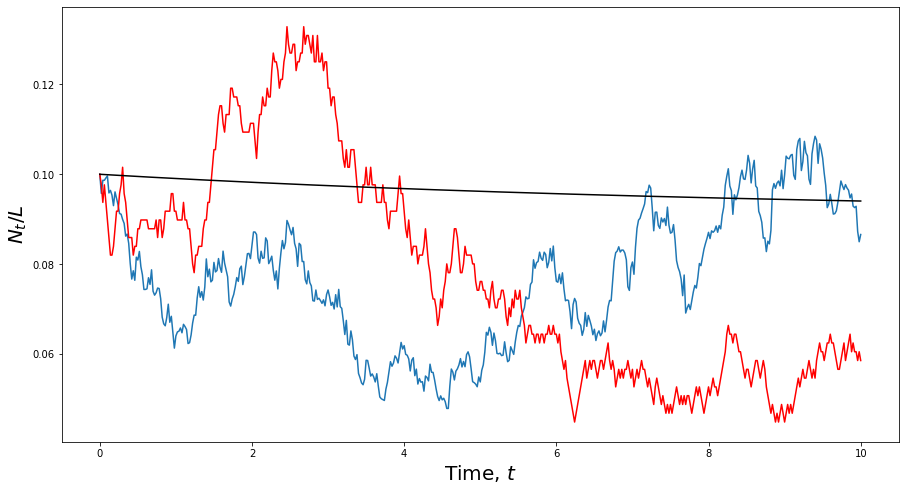

In [156]:
plt.figure(figsize = (15,8))
plt.plot(times,Xt)
plt.plot(times,N,'r')
plt.plot(times,Yt,'k')

#plt.xscale('log')
#plt.yscale('log')
    
plt.xlabel('Time, $t$', fontsize = 20)
plt.ylabel('$N_t /L$', fontsize= 20)